In [1]:
import json
import numpy as np
import math
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [3]:
# Función para leer archivo y guardar filas donde la primera columna sea "deuteron"
def filtrar_deuteron(archivo_entrada, archivo_salida):
    with open(archivo_entrada, 'r') as f_in, open(archivo_salida, 'w') as f_out:
        for linea in f_in:
            # Dividir cada línea en columnas usando espacios
            columnas = linea.split()
            
            # Verificar si la primera columna es "deuteron"
            if columnas[0] == 'deuteron':
                # Escribir la línea completa en el archivo de salida
                f_out.write(linea)

# Especifica los nombres de los archivos
archivo_entrada = 'secondary-particles-neutron-capturado.txt'  # Cambia a la ruta de tu archivo de entrada
archivo_salida = 'energia_deuteron.txt'  # Cambia a la ruta de tu archivo de salida

# Llamar a la función
filtrar_deuteron(archivo_entrada, archivo_salida)

In [5]:
# Función para leer el archivo y escribir columnas 1 y 9 en un archivo nuevo
def leer_y_escribir_columnas(archivo_entrada, archivo_salida):
    with open(archivo_entrada, 'r') as f_in, open(archivo_salida, 'w') as f_out:
        for linea in f_in:
            # Dividir cada línea en columnas usando espacios
            columnas = linea.split()
            
            # Asegurarse de que hay al menos 9 columnas
            if len(columnas) >= 9:
                # Seleccionar la 1ª columna (índice 0) y la 9ª columna (índice 8)
                #columna_1 = columnas[0]
                columna_9 = columnas[8]
                
                # Escribir las columnas seleccionadas en el archivo de salida
                f_out.write(f"{columna_9}\n")

# Especifica los nombres de los archivos
archivo_entrada = 'energia_deuteron.txt'  # Cambia a la ruta de tu archivo de entrada
archivo_salida = 'energia-deuterones.txt'  # Cambia a la ruta de tu archivo de salida

# Llamar a la función
leer_y_escribir_columnas(archivo_entrada, archivo_salida)

Valor medio: 0.0013190440251932437
Desviación estándar: 1.0078993793557782e-05


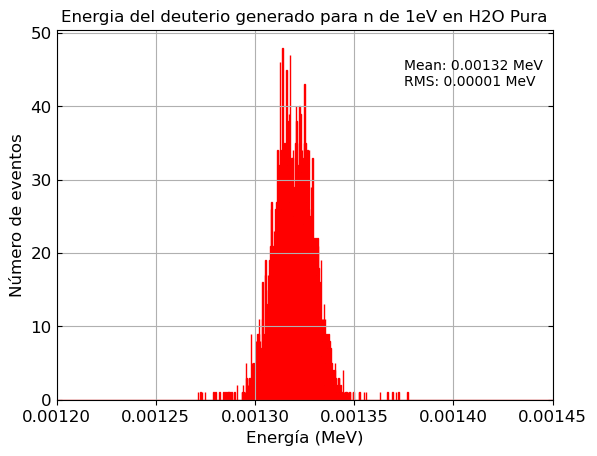

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Función para leer el archivo, generar el histograma y calcular estadísticas
def analizar_datos(archivo):
    # Leer los datos del archivo
    datos = []
    with open(archivo, 'r') as f:
        for linea in f:
            valor = float(linea.strip())
            # Filtrar los valores entre 0.00125 y 0.00149
            if 0.00125 <= valor <= 0.00149:
            # Convertir cada línea a un número flotante y agregarlo a la lista
               datos.append(valor)
    
    # Convertir la lista de datos a un array de NumPy para realizar cálculos fácilmente
    datos = np.array(datos)
    
    # Calcular el valor medio y la desviación estándar
    valor_medio = np.mean(datos)
    std_dev = np.std(datos)
    num_entradas = np.sum(datos)
    
    # Imprimir el valor medio y la desviación estándar
    print(f"Valor medio: {valor_medio}")
    print(f"Desviación estándar: {std_dev}")

    #plt.plot(bin_centers, counts, marker='.', linestyle='-', markersize=4, color='blue', label='2x$10^{5}$ N. a 1 MeV en agua pura')
    # Generar el histograma dentro del rango [-0.002, 0.004]
    plt.hist(datos, bins=1000, range=(0.00120, 0.00145), edgecolor='red')
    #stats_text = f'Nª entradas:{num_entradas:.0f} \nMean: {valor_medio:.5f} MeV\nRMS: {std_dev:.5f} MeV'
    stats_text = f'\nMean: {valor_medio:.5f} MeV\nRMS: {std_dev:.5f} MeV'
    plt.text(0.7, 0.85, stats_text, transform=plt.gca().transAxes)
    # Mostrar los tics (marcas) a ambos lados del eje Y
    plt.tick_params(axis='y', which='both', direction='in', labelsize=12, right=True)
    plt.title('Energia del deuterio generado para n de 1eV en H2O Pura')
    plt.xlabel('Energía (MeV)', fontsize=12)
    plt.xlim(0.00120, 0.00145)  # Establecer el límite del eje x
    plt.tick_params(axis='x', which='both', labelsize=12)  # Tics mayores
    plt.ylabel('Número de eventos', fontsize=12)
    plt.grid(True)
    #plt.legend()
    pdf_filename_stat_charge = 'Distribucion-energia-deuterio-H2O-Pura-1eV.pdf'
    plt.savefig(pdf_filename_stat_charge, format='pdf')
    plt.savefig('Distribucion-energia-deuterio-H2O-Pura-1eV.jpg', format='jpg')
    plt.show()

# Especifica el nombre del archivo
archivo = 'energia-deuterones.txt'  # Cambia a la ruta de tu archivo
analizar_datos(archivo)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
archivo = 'neutrones_capturados.txt'
# Función para leer el archivo y extraer la 9ª columna, multiplicada por 10^9
def leer_archivo_y_generar_histograma(archivo):
    datos_columna_9 = []
    
    # Abrir el archivo para lectura
    with open(archivo, 'r') as f:
        for linea in f:
            # Dividir cada línea en columnas basadas en espacios (asumiendo un formato similar)
            columnas = linea.split()
            
            # Tomar la 9ª columna (índice 8 en Python), convertirla a float y multiplicar por 1e9
            valor_columna_9 = float(columnas[8]) * 1e9
            datos_columna_9.append(valor_columna_9)
    
    # Convertir los datos a un array de NumPy para facilidad de manejo
    datos_columna_9 = np.array(datos_columna_9)
    
    # Generar el histograma
    plt.hist(datos_columna_9, bins=50, edgecolor='black')
    plt.title('Histograma de la 9ª columna multiplicada por 10^9')
    plt.xlabel('Valor (9ª columna * 10^9)')
    plt.ylabel('Frecuencia')
    
    # Mostrar el histograma
    plt.show()

# Especifica el nombre del archivo
nombre_archivo = 'datos.txt'  # Cambia a la ruta de tu archivo
leer_archivo_y_generar_histograma(nombre_archivo)

FileNotFoundError: [Errno 2] No such file or directory: 'datos.txt'

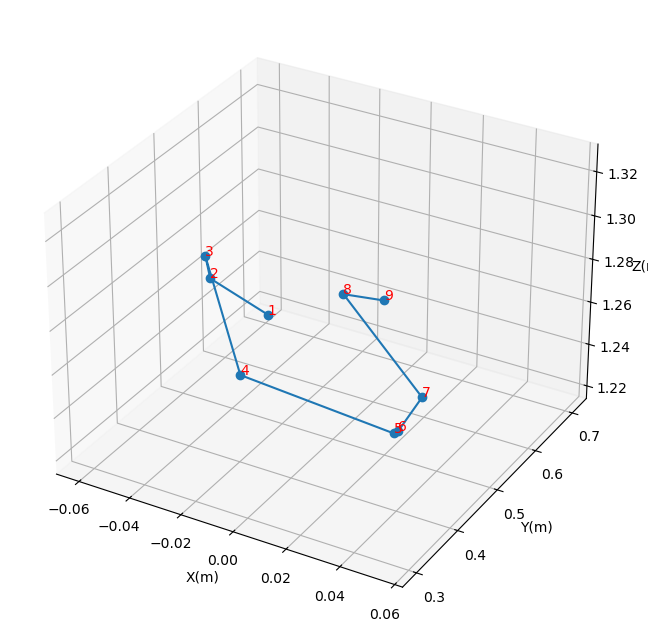

In [9]:
data = np.loadtxt('gama-captura-coordenadas.txt', usecols=(6, 7, 8))

# Multiplicar las columnas por 0.001 para convertir a la nueva escala
x = data[:, 0] * 0.001
y = data[:, 1] * 0.001
z = data[:, 2] * 0.001

# Crear la figura y los ejes 3D con un tamaño mayor
fig = plt.figure(figsize=(12, 8))  # Aumenta el tamaño de la figura
#fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Etiquetar cada punto con su índice
for i in range(len(x)):
    ax.text(x[i], y[i], z[i], f'{i+1}', color='red', fontsize=10)

# Graficar los puntos
ax.plot(x, y, z, marker='o')

# Configurar etiquetas de los ejes
ax.set_xlabel('X(m)')
ax.set_ylabel('Y(m)')
ax.set_zlabel('Z(m)')

# Mostrar la gráfica
plt.show()

In [13]:
import pandas as pd
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Border, Side

# Especifica la ruta al archivo que contiene los datos
archivo = 'gama-captura-coordenadas.txt'

# Leer el archivo, asumiendo que los datos están separados por espacios o tabulaciones
# El archivo tiene 12 columnas, pero solo vamos a leer las necesarias
columnas_originales = ['Columna1', 'Columna2', 'Columna3', 'Columna4', 'Columna5', 
                       'Columna6', 'Columna7', 'Columna8', 'Columna9', 'Columna10', 
                       'Columna11', 'Columna12']

# Leer el archivo con pandas, especificando las columnas que nos interesan
datos = pd.read_csv(archivo, delim_whitespace=True, header=None, names=columnas_originales)

# Seleccionar solo las columnas necesarias (1, 2, 6, 7, 8, 9, 11, 12)
tabla_filtrada = datos[['Columna1', 'Columna2', 'Columna6', 'Columna7', 'Columna8', 'Columna9', 'Columna11', 'Columna12']]

# Renombrar las columnas con las etiquetas especificadas
tabla_filtrada.columns = ['Partícula', 
                          'P.origen', 
                          'P. Interacciòn', 
                          'x (mm)', 
                          'y (mm)', 
                          'z (mm)', 
                          'E. gamma (MeV)', 
                          'E. e- (MeV)']
# Crear un nuevo libro de Excel y agregar una hoja
wb = Workbook()
ws = wb.active
ws.title = "Tabla Filtrada"

# Agregar los datos de la tabla a la hoja de Excel
for r in dataframe_to_rows(tabla_filtrada, index=False, header=True):
    ws.append(r)

# Definir un estilo de borde para las celdas
thin_border = Border(left=Side(style='thin'), 
                     right=Side(style='thin'), 
                     top=Side(style='thin'), 
                     bottom=Side(style='thin'))

# Aplicar el borde a todas las celdas en la hoja de trabajo
for row in ws.iter_rows(min_row=1, max_row=ws.max_row, min_col=1, max_col=ws.max_column):
    for cell in row:
        cell.border = thin_border

# Guardar el archivo con bordes en un archivo Excel
wb.save("tabla_filtrada_con_bordes.xlsx")


# Imprimir la tabla en la consola (opcional)
print(tabla_filtrada)

  Partícula  P.origen P. Interacciòn   x (mm)   y (mm)   z (mm)  \
0     gamma  nCapture          compt -60.6181  709.287  1216.26   
1     gamma  nCapture          compt -49.6817  510.064  1270.55   
2     gamma  nCapture          compt -50.4733  504.655  1281.42   
3     gamma  nCapture          compt -12.1620  358.981  1264.67   
4     gamma  nCapture          compt  43.9446  365.693  1257.70   
5     gamma  nCapture          compt  45.6200  366.256  1259.45   
6     gamma  nCapture          compt  54.4551  362.795  1278.26   
7     gamma  nCapture          compt  33.0198  317.400  1323.39   
8     gamma  nCapture          Trans  50.4495  297.184  1330.05   

   E. gamma (MeV)  E. e- (MeV)  
0        2.224370     0.746378  
1        0.746378     0.498546  
2        0.498546     0.298371  
3        0.298371     0.199351  
4        0.199351     0.172668  
5        0.172668     0.165610  
6        0.165610     0.145526  
7        0.145526     0.125969  
8        0.125969     0.125969  

In [19]:
import pandas as pd
from fpdf import FPDF

# Especifica la ruta al archivo que contiene los datos
archivo = 'gama-captura-coordenadas.txt'

# Leer el archivo, asumiendo que los datos están separados por espacios o tabulaciones
columnas_originales = ['Columna1', 'Columna2', 'Columna3', 'Columna4', 'Columna5', 
                       'Columna6', 'Columna7', 'Columna8', 'Columna9', 'Columna10', 
                       'Columna11', 'Columna12']

datos = pd.read_csv(archivo, delim_whitespace=True, header=None, names=columnas_originales)

# Seleccionar solo las columnas necesarias (1, 2, 6, 7, 8, 9, 11, 12)
tabla_filtrada = datos[['Columna1', 'Columna2', 'Columna6', 'Columna7', 'Columna8', 'Columna9', 'Columna11', 'Columna12']]

# Renombrar las columnas con las etiquetas especificadas
tabla_filtrada.columns = ['Partícula', 
                          'P.origen', 
                          'P. Interacciòn', 
                          'x (mm)', 
                          'y (mm)', 
                          'z (mm)', 
                          '$E_{\gamma} (MeV)$', 
                          'E. e- (MeV)']

# Crear un objeto PDF
pdf = FPDF()
pdf.add_page()

# Configurar fuente y tamaño
pdf.set_font("Arial", size=10)

# Ancho de las columnas en mm
column_widths = [25, 30, 30, 30, 30, 30, 30, 30]

# Altura de la celda
cell_height = 8

# Escribir los encabezados
for i, header in enumerate(tabla_filtrada.columns):
    pdf.cell(column_widths[i], cell_height, header, border=1, ln=0, align='C')

pdf.ln(cell_height)

# Escribir las filas de la tabla
for _, row in tabla_filtrada.iterrows():
    for i, value in enumerate(row):
        pdf.cell(column_widths[i], cell_height, str(value), border=1, ln=0, align='C')
    pdf.ln(cell_height)

# Guardar el archivo PDF
pdf.output("tabla_filtrada.pdf")

# Imprimir la tabla en la consola (opcional)
print(tabla_filtrada)

  Partícula  P.origen P. Interacciòn   x (mm)   y (mm)   z (mm)  \
0     gamma  nCapture          compt -60.6181  709.287  1216.26   
1     gamma  nCapture          compt -49.6817  510.064  1270.55   
2     gamma  nCapture          compt -50.4733  504.655  1281.42   
3     gamma  nCapture          compt -12.1620  358.981  1264.67   
4     gamma  nCapture          compt  43.9446  365.693  1257.70   
5     gamma  nCapture          compt  45.6200  366.256  1259.45   
6     gamma  nCapture          compt  54.4551  362.795  1278.26   
7     gamma  nCapture          compt  33.0198  317.400  1323.39   
8     gamma  nCapture          Trans  50.4495  297.184  1330.05   

   $E_{\gamma} (MeV)$  E. e- (MeV)  
0            2.224370     0.746378  
1            0.746378     0.498546  
2            0.498546     0.298371  
3            0.298371     0.199351  
4            0.199351     0.172668  
5            0.172668     0.165610  
6            0.165610     0.145526  
7            0.145526     0.12596

In [18]:
from fpdf import FPDF
import pandas as pd

# Especifica la ruta al archivo que contiene los datos
archivo = 'gama-captura-coordenadas.txt'

# Lee el archivo en un DataFrame, asumiendo que las columnas están separadas por espacios
columnas = ['Partícula', 'P. origen', 'P. interacciòn', 'X (mm)', 'Y (mm)', 'Z (mm)', 'E. Gamma (MeV)', 'E. e- (MeV)']
df = pd.read_csv(archivo, delim_whitespace=True, header=None, usecols=[0, 1, 5, 6, 7, 8, 10, 11], names=columnas)

# Crea una clase PDF personalizada para manejar la tabla en formato horizontal
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Tabla de Datos de Partículas', 0, 1, 'C')

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Página {self.page_no()}', 0, 0, 'C')

    def create_table(self, df):
        self.add_page(orientation='L')  # 'L' for landscape (horizontal format)
        self.set_font('Arial', 'B', 10)

        # Ancho de las columnas
        col_widths = [40, 50, 50, 30, 30, 30, 40, 40]

        # Encabezado de la tabla
        for i, col_name in enumerate(df.columns):
            self.cell(col_widths[i], 10, col_name, 1, 0, 'C')
        self.ln()

        # Filas de la tabla
        self.set_font('Arial', '', 10)
        for _, row in df.iterrows():
            for i, col in enumerate(row):
                self.cell(col_widths[i], 10, str(col), 1, 0, 'C')
            self.ln()

# Instancia de PDF y creación de la tabla
pdf = PDF()
pdf.set_left_margin(10)
pdf.set_right_margin(10)
pdf.add_page()
pdf.create_table(df)

# Guarda el PDF en un archivo
pdf.output('tabla_particulas.pdf')

''

In [20]:
import pandas as pd

# Especifica la ruta al archivo que contiene los datos
archivo = 'gama-captura-coordenadas.txt'

# Lee el archivo en un DataFrame, asumiendo que las columnas están separadas por espacios
columnas = ['Partícula', 'Proceso de donde se generó', 'Proceso que genera', 'Coord X (mm)', 'Coord Y (mm)', 'Coord Z (mm)', 'Energía Gamma (MeV)', 'Energía al Electrón (MeV)']
df = pd.read_csv(archivo, delim_whitespace=True, header=None, usecols=[0, 1, 5, 6, 7, 8, 10, 11], names=columnas)

# Genera el contenido LaTeX
latex_code = r"""
\documentclass[a4paper,12pt]{article}
\usepackage{geometry}
\geometry{left=1in, right=1in, top=1in, bottom=1in}
\usepackage{longtable}

\begin{document}

\title{Tabla de Datos de Partículas}
\author{}
\date{}
\maketitle

\begin{longtable}{|c|c|c|c|c|c|c|c|}
\hline
\textbf{Partícula} & \textbf{Proceso de donde se generó} & \textbf{Proceso que genera} & \textbf{Coord X (mm)} & \textbf{Coord Y (mm)} & \textbf{Coord Z (mm)} & \textbf{Energía Gamma (MeV)} & \textbf{Energía al Electrón (MeV)} \\
\hline
\endfirsthead

\hline
\textbf{Partícula} & \textbf{Proceso de donde se generó} & \textbf{Proceso que genera} & \textbf{Coord X (mm)} & \textbf{Coord Y (mm)} & \textbf{Coord Z (mm)} & \textbf{Energía Gamma (MeV)} & \textbf{Energía al Electrón (MeV)} \\
\hline
\endhead

\hline
\endfoot

\hline
\endlastfoot
"""

# Añadir las filas de datos
for index, row in df.iterrows():
    latex_code += f"{row['Partícula']} & {row['Proceso de donde se generó']} & {row['Proceso que genera']} & {row['Coord X (mm)']:.2f} & {row['Coord Y (mm)']:.2f} & {row['Coord Z (mm)']:.2f} & {row['Energía Gamma (MeV)']:.2f} & {row['Energía al Electrón (MeV)']:.2f} \\\\ \hline\n"

latex_code += r"""
\end{longtable}

\end{document}
"""

# Guarda el código LaTeX en un archivo
with open('tabla_particulas.tex', 'w') as f:
    f.write(latex_code)

print("El archivo LaTeX ha sido generado y guardado como 'tabla_particulas.tex'.")


El archivo LaTeX ha sido generado y guardado como 'tabla_particulas.tex'.
